# Lab 3: Linear Models 

In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
# Setup

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')


## Linear Regression "Under the Hood"

Goal: Implement vectorized Linear Regression from scratch using NumPy, avoiding slow for-loops.

In [3]:
def predict_vectorized(X, w, b):
    """
    Computes predictions using vectorization.
    Args:
      X: Data matrix of shape (N, D)
      w: Weight vector of shape (D,)
      b: Bias scalar
    Returns:
      y_pred: Vector of predictions of shape (N,)
    """
    # TODO: Implement the dot product formula
    # Hint: Use np.dot()

    y_pred = np.dot(X,w) + b
    return y_pred


In [ ]:
# TODO: Implement the dot product formula
    # Hint: Use np.dot()

    y_pred = np.dot(X, w) + b
    return y_pred

# Example usage:
X_sample = np.array([[1, 2], [3, 4], [5, 6]]) # N=3, D=2
w_sample = np.array([0.5, -0.2])             # D=2
b_sample = 0.1

predictions = predict_vectorized(X_sample, w_sample, b_sample)
print(f"Predictions: {predictions}")

### 1. Vectorized Prediction

Mathematical Formula: $\hat{y} = Xw + b$.Concept: 

Using matrix multiplication (np.dot) is significantly faster than looping through data points.

#### 1.2 The Cost Function (MSE)

Mathematical Formula: $J(w,b) = \frac{1}{2N} \sum_{i=1}^{N} (\hat{y}^{(i)} - t^{(i)})^2$.

In [8]:
def compute_cost(X, y_true, w, b):
    """
    Computes the Mean Squared Error cost.
    """
    N = len(y_true)
    y_pred = predict_vectorized(X, w, b)
    
    # TODO: Implement the MSE formula
    # Hint: Use np.sum and square the difference

    mse = np.sum((y_pred - y_true) ** 2) / N
    cost = mse
    ##cost= (1/N) * np.sum((y_pred - y_true) ** 2)
    return cost

#### 1.3 Gradient Descent Implementation
Update Rules:

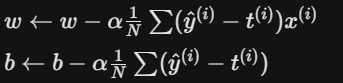

Iter 0: Cost 1442.8889
Iter 100: Cost 78.0544
Iter 200: Cost 78.0543
Iter 300: Cost 78.0543
Iter 400: Cost 78.0543


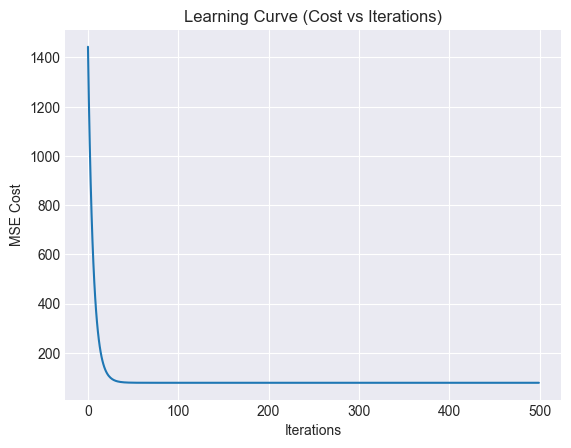

In [ ]:
def gradient_descent(X, y, w, b, learning_rate, iterations):
    cost_history = []
    N = len(y)
    
    for i in range(iterations):
        y_pred = predict_vectorized(X, w, b)
        error = y_pred - y
        
        # TODO: Calculate Gradients
        # dw should be the average of (error * X)
        dw = (1/N) * np.dot(X.T, error)
        # db should be the average of error
        db = (1/N) * np.sum(error)

        # TODO: Update parameters
        w_final = w - learning_rate * dw
        b_final = b - learning_rate * db
        
        # Record cost
        w, b = w_final, b_final
        
        cost_history.append(compute_cost(X, y, w, b))
        
        if i % 100 == 0:
            print(f"Iter {i}: Cost {cost_history[-1]:.4f}")
            
    return w, b, cost_history

# --- TEST YOUR CODE ---
# Generate synthetic data
X_synth, y_synth = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
w_init = np.zeros(X_synth.shape[1])
b_init = 0

# Run GD
w_final, b_final, costs = gradient_descent(X_synth, y_synth, w_init, b_init, learning_rate=0.1, iterations=500)

# Visualize Cost
plt.plot(costs)
plt.title("Learning Curve (Cost vs Iterations)")
plt.xlabel("Iterations")
plt.ylabel("MSE Cost")
plt.show()

## The Bias-Variance Tradeoff 

Goal: Visualize overfitting using Polynomial Regression and fix it with Ridge Regularization

2.1 Generating Non-Linear DataWe will generate data that follows a sine wave pattern $y = \sin(2\pi x)$

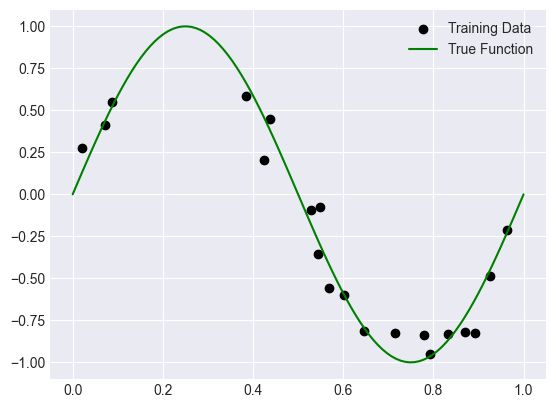

In [ ]:
# Generate data
np.random.seed(0)
X = np.sort(np.random.rand(20, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.1, X.shape[0])

X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_true = np.sin(2 * np.pi * X_test).ravel()

plt.scatter(X, y, color='black', label='Training Data')
plt.plot(X_test, y_true, color='green', label='True Function')
plt.legend()
plt.show()

#We create fake data that follows a sine curve but is noisy, then we try to train ML models to learn this curve.

## 2.2 Overfitting with Polynomials
We will fit a Degree 9 polynomial. Since we only have 20 data points, this model is too complex and should overfit.

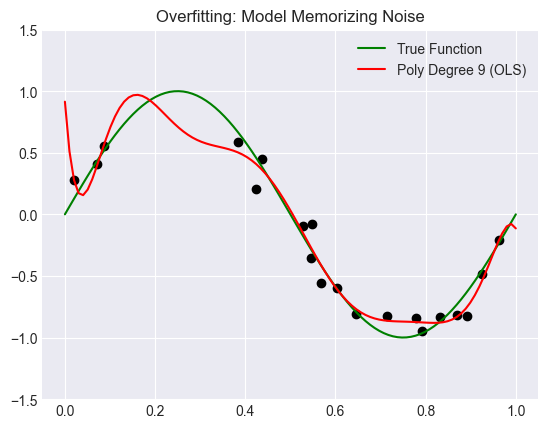

In [12]:
# Create a pipeline: Polynomial Features -> Linear Regression
# Degree 9 allows the model to "wiggle" significantly
poly_model = make_pipeline(PolynomialFeatures(degree=9), LinearRegression())
poly_model.fit(X, y)
y_pred_poly = poly_model.predict(X_test)

plt.scatter(X, y, color='black')
plt.plot(X_test, y_true, color='green', label='True Function')
plt.plot(X_test, y_pred_poly, color='red', label='Poly Degree 9 (OLS)')
plt.ylim(-1.5, 1.5)
plt.legend()
plt.title("Overfitting: Model Memorizing Noise")
plt.show()

2.3 Taming with Ridge Regularization
Cost Function: $J(w) = \text{MSE} + \lambda ||w||^2$.
- Task: Replace LinearRegression with Ridge.
- Hypothesis: The curve should be smoother because Ridge penalizes large coefficients.

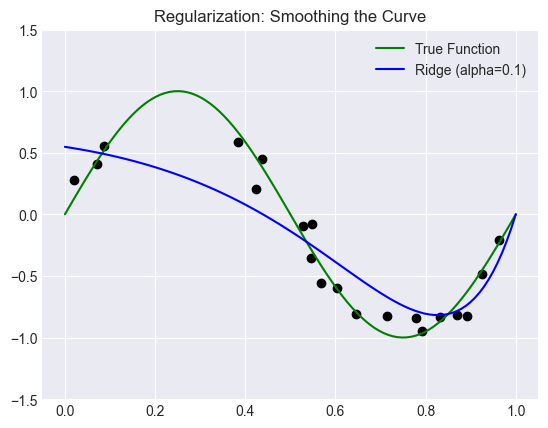

In [14]:
# TODO: Try changing alpha (lambda) values: 0.0001, 0.1, 1.0
ridge_model = make_pipeline(PolynomialFeatures(degree=9), Ridge(alpha=0.1))
ridge_model.fit(X, y)
y_pred_ridge = ridge_model.predict(X_test)

plt.scatter(X, y, color='black')
plt.plot(X_test, y_true, color='green', label='True Function')
plt.plot(X_test, y_pred_ridge, color='blue', label='Ridge (alpha=0.1)')
plt.ylim(-1.5, 1.5)
plt.legend()
plt.title("Regularization: Smoothing the Curve")
plt.show()

## Classification & Decision Boundaries 
Goal: Compare Logistic Regression and SVMs on non-linearly separable data.


### 3.1 The Moons Dataset
Load a dataset that cannot be separated by a straight line.

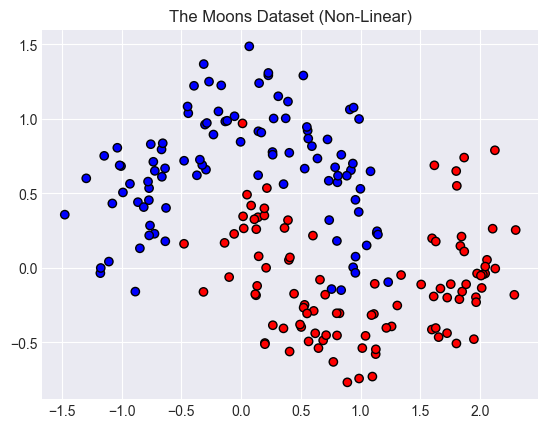

In [15]:
X_moon, y_moon = make_moons(n_samples=200, noise=0.2, random_state=42)

plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap='bwr', edgecolor='k')
plt.title("The Moons Dataset (Non-Linear)")
plt.show()

### 3.2 Helper Function: Visualizing Boundaries
Run this cell to define a helper function for plotting.

In [16]:
def plot_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.title(title)
    plt.show()

3.3 SVM with RBF Kernel
The RBF kernel lifts data into higher dimensions where it becomes linearly separable.

Hyperparameter C: Penalty for error. High C = Strict (Overfit?), Low C = Loose (Underfit?).

Hyperparameter Gamma: "Bumpy"ness. High Gamma = Complex boundary, Low Gamma = Smooth boundary.

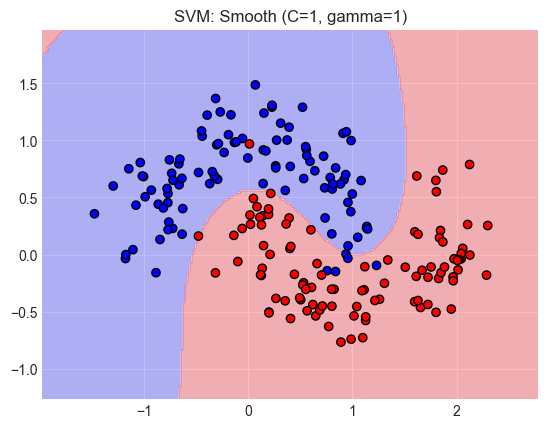

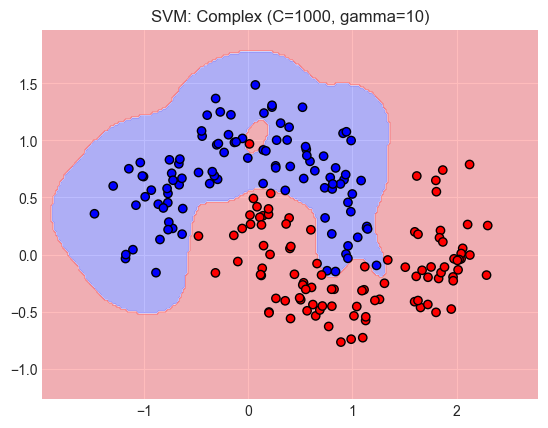

In [17]:
# Experiment 1: High Regularization (Low C), Smooth Boundary (Low Gamma)
svm_smooth = SVC(kernel='rbf', C=1, gamma=1)
svm_smooth.fit(X_moon, y_moon)
plot_boundary(svm_smooth, X_moon, y_moon, "SVM: Smooth (C=1, gamma=1)")

# Experiment 2: Low Regularization (High C), Complex Boundary (High Gamma)
# This mimics "hard margin" behavior on non-separable data
svm_complex = SVC(kernel='rbf', C=1000, gamma=10)
svm_complex.fit(X_moon, y_moon)
plot_boundary(svm_complex, X_moon, y_moon, "SVM: Complex (C=1000, gamma=10)")

Module 4: Ensembles 

Goal: Demonstrate how Ensembles reduce variance (smoothing jagged boundaries).

4.1 Decision Tree vs. Random Forest
A single tree is high variance (jagged). A Random Forest averages many trees to create a robust boundary.

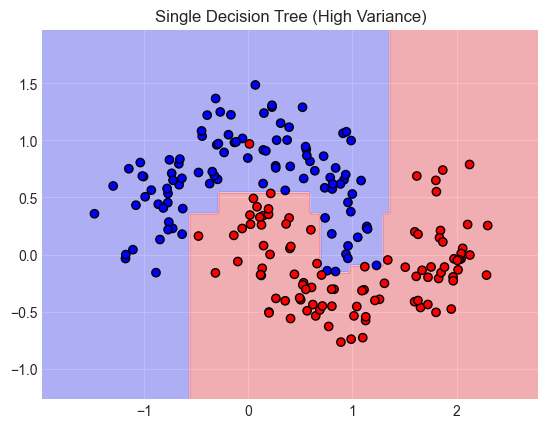

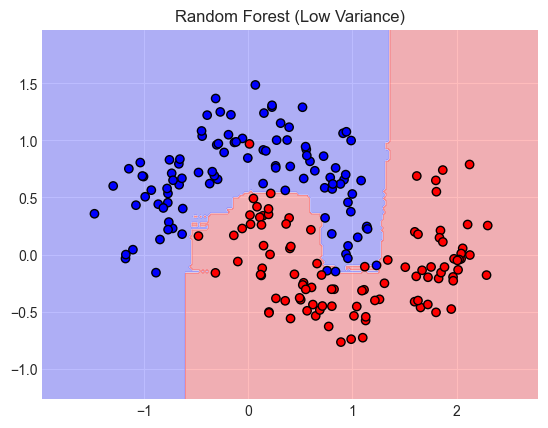

In [18]:
# 1. Single Decision Tree (Prone to overfitting)
dt_model = DecisionTreeClassifier(max_depth=None, random_state=42)
dt_model.fit(X_moon, y_moon)
plot_boundary(dt_model, X_moon, y_moon, "Single Decision Tree (High Variance)")

# 2. Random Forest (Bagging + Feature Randomization)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_moon, y_moon)
plot_boundary(rf_model, X_moon, y_moon, "Random Forest (Low Variance)")

4.2 Discussion Question

Look at the boundary of the Random Forest compared to the Single Decision Tree.

- Analyze and give an answer

# Classwork: Applied Linear Models 
Objective: End-to-End Regression Pipeline on Real Data Dataset: California Housing Dataset (Predicting House Prices) Tools: Scikit-Learn, Pandas, Seaborn

Kaggle: https://www.kaggle.com/datasets/camnugent/california-housing-prices
Scikit-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html